## Transmission Economic Assessment with PyPSA-USA


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Stanford-Sustainable-Systems-Lab/CEE_272R_spring_2024/blob/main/HM5/HM5_California_starter_notebook.ipynb)

CEE 272R Homework 6\\
Assigned on 5/17/24, due at 11:59pm on Friday, 5/24
Written by Kamran Tehranchi

You are given a simplified network of the PyPSA-USA WECC network with the following characteristics:
- 3 buses
- 3 lines
- 167 Generators (MW), listed below by fuel type
```
    CCGT          56915.400
    OCGT          35345.100
    coal          24395.000
    geothermal     3914.200
    hydro         52844.738
    nuclear        7732.600
    oil            1100.300
    onwind        28557.900
    solar         29108.000
```
- Peak Load (MW):
```
    CA    49420.22
    PNW   17931.67
    SW    30590.69
```
- Time-series data for 12 months Jan - Dec 2019

**Question**: You have the option to build an additional 230kV transmission line between California and the Southwest. We are interested in understanding the regional impacts of building this transmission line. Using the economic assessment method with Production Cost Modeling described in-class, should we build a new transmission line between California (CA) and the South West (SW) nodes?

Note: at the end of this assignment you should have 4 lines in your network.

Install Dependencies

In [ ]:
!pip install pypsa highspy matplotlib cartopy xarray==2023.9.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the network

In [ ]:
import pypsa
import matplotlib.pyplot as plt
network = pypsa.Network('/content/drive/MyDrive/Energy276_Homework3/wecc_homework3.nc')


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip



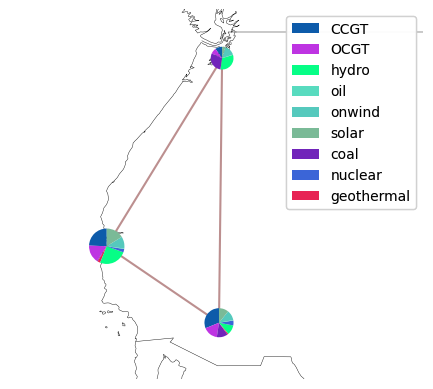

In [ ]:
from pypsa.plot import add_legend_patches
import cartopy.crs as ccrs
import random

carriers = network.generators.carrier.unique()
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in carriers]
network.madd("Carrier", carriers, color=colors)

fig = plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
capacities = network.generators.groupby(["bus", "carrier"]).p_nom.sum()

network.plot(
    ax=ax,
    bus_sizes=capacities / 2e5,
    margin=0.2
)

add_legend_patches(ax, colors, carriers)

a) [5 Points] Simulate a sequential DCOPF (production cost model) of the current given network and create a labeled time-series plot of the Locational Marginal Prices (LMPs)

In [ ]:
#Dispatch Plot of first 200 hours
nhours = 200
fig, ax = plt.subplots(figsize=(20, 5))
p_by_carrier = network.generators_t.p.groupby(network.generators.carrier, axis=1).sum().div(1e3).iloc[:nhours]
p_by_carrier.plot(
    kind="area",
    ax=ax,
    linewidth=0,
    cmap="tab20b",
)
ax.legend(ncol=5, loc="upper left", frameon=False)
ax.set_ylabel("GW")

b1) [15 points] Calculate Load Costs and Adjusted Production Cost (APC) for California prior to expanding the line. Report all Costs in Millions of Dollars.


Reminder:
\begin{align*}
\text{Regional Adjusted Production Cost (APC)} &= \text{Production Cost} + \text{Purchases} - \text{Sales} &\\
\text{Production Cost} &= \sum_t^T \sum_g^G ( \text{P}_{g,t} \times \text{O}_{g,t} ) &\\
\text{Purchases} &= \sum_t^T (\text{Imports}_t \times \text{Load Weighted LMP}_t) &\\
\text{Sales} &= \sum_t^T (\text{Exports}_t \times \text{Generation Weighted LMP}_t) &\\
\text{Load Weighted LMP}_t &= \frac{\sum_{n} \text{Load Costs}_{n,t} }{\sum_{n} \text{Load}_{n,t}}  \quad \forall \quad n \in region &\\
\text{Generation Weighted LMP}_t &= \frac{\sum_{n} \text{Generation Revenue}_{n,t} }{\sum_{n} \text{Generation}_{n,t} } \quad \forall \quad n \in region &\\
\quad &\\
\text{where} \quad
\text{P: Active power generation of Generator g} &\\
\text{O: Operational/Marginal Cost of Generator g} &
\end{align*}


In [ ]:
# Here is some code to help you get started (these will only run after you have completed your simulation):
# You can read exports and imports as "to-from" based on transmission line/column name
exports = network.lines_t.p0.where(network.lines_t.p0 > 0, 0) #
imports = network.lines_t.p0.where(network.lines_t.p0 < 0, 0) * -1
generator_production_by_node = network.generators_t.p.groupby(network.generators.bus, axis=1).sum()

In [ ]:
# Calculate load Costs for CA, report one # in MM$:

In [ ]:
# Calculate APC for California, report one #:
# Production Cost

# Purchases

# Sales

# APC


# print("Adjusted Production Cost: ", APC_ca / 1e6)
# print("Production Cost: ", production_costs_ca / 1e6)
# print("Sales: ", sales_ca / 1e6)
# print("Purchases: ",purchases_ca / 1e6)

b2) [15 points] Calculate Load Costs and Adjusted Production Cost (APC) for the WECC not including California prior to expanding the line:

Reminder:
\begin{align*}
\text{Regional Adjusted Production Cost (APC)} &= \text{Production Cost} + \text{Purchases} - \text{Sales} &\\
\text{Production Cost} &= \sum_t^T \sum_g^G ( \text{P}_{g,t} \times \text{O}_{g,t} ) &\\
\text{Purchases} &= \sum_t^T (\text{Imports}_t \times \text{Load Weighted LMP}_t) &\\
\text{Sales} &= \sum_t^T (\text{Exports}_t \times \text{Generation Weighted LMP}_t) &\\
\text{Load Weighted LMP}_t &= \frac{\sum_{n} \text{Load Costs}_{n,t} }{\sum_{n} \text{Load}_{n,t}}  \quad \forall \quad n \in region &\\
\text{Generation Weighted LMP}_t &= \frac{\sum_{n} \text{Generation Revenue}_{n,t} }{\sum_{n} \text{Generation}_{n,t} } \quad \forall \quad n \in region &\\
\quad &\\
\text{where} \quad
\text{P: Active power generation of Generator g} &\\
\text{O: Operational/Marginal Cost of Generator g} &
\end{align*}



In [ ]:
# Calculate load Costs for Non-CA, report one # in MM$:


In [ ]:
#Calculate APC for Non-CA:
# Production Cost

# Purchases

# Sales

# APC


c) [2 pts] Add the line to the network

In [ ]:
line_name = "CA-SW_newline"
bus0 = 'CA'
bus1 = 'SW'
reactance = 0.1 # Ohm
transfer_capacity = 2000 # MW (s_nom)

In [ ]:
# Add the line by filling in the missing parameters here:
network.add(
    "Line",
    line_name,
    # insert,
    # insert,
    # insert,
    # insert,
)

d) [2 pts] Simulate the operations problem with the new line:

e1) [10 pts] Calculate the new Load Costs and Adjusted Production Costs (APC) for California:

In [ ]:
# Here is some code to help you get started (these will only run after you have completed your simulation):
# "to-from" based on line/column name
exports = network.lines_t.p0.where(network.lines_t.p0 > 0, 0) #
imports = network.lines_t.p0.where(network.lines_t.p0 < 0, 0) * -1
generator_production_by_node = network.generators_t.p.groupby(network.generators.bus, axis=1).sum()

In [ ]:
# Calculate Load Costs for California, report one #:


In [ ]:
# Calculate APC for California, report one #:
# Production Cost

# Purchases

#Sales

# APC

e2) [10 pts] Calculate the new Load Costs and Adjusted Production Costs for the WECC not including California:

In [ ]:
# Calculate load Costs for Non-CA, report one #:


In [ ]:
#Calculate APC for Non-CA:
# Production Cost

# Purchases

# Sales

# APC

f) [15 pts] Conduct Cost Benefit Analysis to determine if the transmission line should be built. Assume we only care about the benefits within California.

- Weight 70\% benefits of load and 30\% benefits of APC
- Assume the same savings patterns occur over the lifetime of the transmission line
- Assume the capital cost of the transmission line is incurred overnight and there is no fixed or variable O&M for the line over its lifetime.
- Discount rate 5\%
- Transmission line has assumed lifetime of 50 years & overnight capital cost of 1e9

If you are in ENERGY 176 you do not need to account for discounting.

In [ ]:
#Calculate Annualized Cost of the line:

In [ ]:
#Cost Benefit Analysis:


g) [5 pts] Does this answer change if we include the costs/benefits of the rest of the WECC?

In [ ]:
#Cost Benefit Analysis:

h) [10 pts] Provide an policy interpretation of the Economic benefits. What does the sign of the Load savings and APC savings imply about the winners and losers of the transmission upgrade?

type answer here

[5 pts- extra credit not required] In the above method we used production cost simulation to estimate the benefits of the transmission expansion. Now use capacity expansion to estimate the optimal capacity of transmission to be added to the network. You can assume linear relationship between capital cost of transmission and nominal capacity of the line.

What is the optimal capacity of the line?